In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Hands on signal filtering

Let's start by preparing a synthetic signal

Text(0, 0.5, 'y')

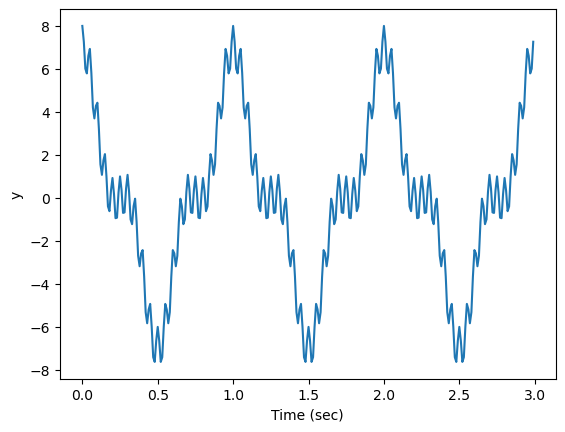

In [2]:
delta_s = 1./100; #sampling interval
f_s = 1./delta_s; #sampling frequency
f = 1.0 # Hz # sinusoidal signal frequency
T = 3.0;
time = np.arange(0.0, T, delta_s) # sampling points at f_s frequency
N=time.size; 

f = 5*np.cos(2 * np.pi * f * time) + 1* np.cos(10 * 4 * np.pi * f * time) + 2* np.cos(3 * 2 * np.pi * f * time) 
plt.plot(time, f)
plt.xlabel("Time (sec)")
plt.ylabel("y")

We now compute its Fourier transform (DFT)

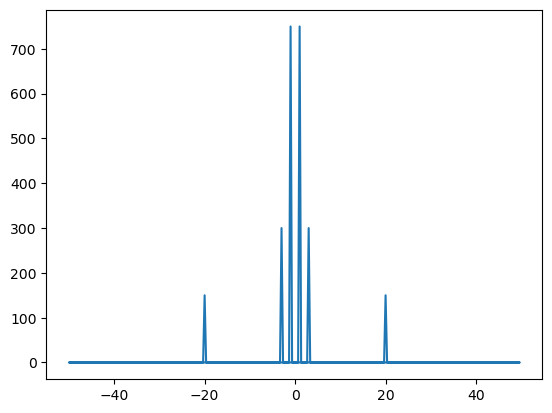

In [3]:
fft_f = np.fft.fft(f)
n = len(fft_f) #array size

freq = np.fft.fftfreq(n, 1/f_s)

plt.plot(freq,np.abs(fft_f))  


## Filters in the frequency domain

### Thresholding

We start off with a filtering by thresholding (hard cut-off)

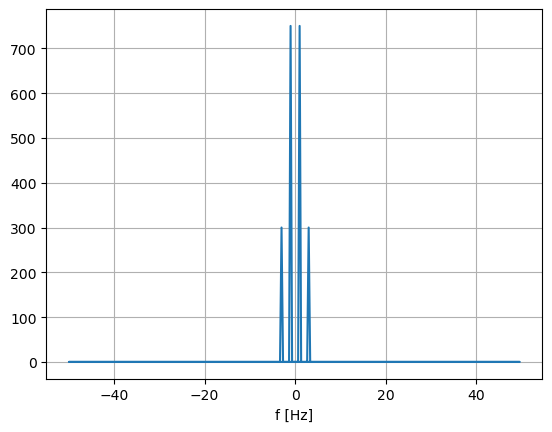

In [4]:
idx = np.argwhere(np.abs(freq)>18)
fft_cut=np.copy(fft_f)
fft_cut[idx]=0

plt.plot(freq,np.abs(fft_cut) )
plt.xlabel('f [Hz]')

plt.grid()

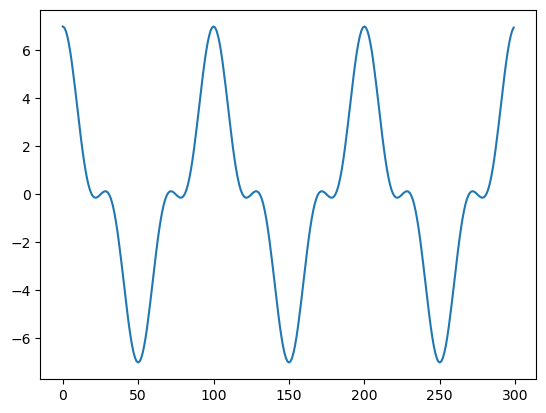

In [5]:
f_cut=np.fft.ifft(fft_cut)
plt.plot(np.real(f_cut))

### Gaussian low pass in Fourier
We now compute a gaussian low pass filter.
It's interesting to see how it behaves for different choices of sigma

In [6]:
def gaussian(sigma,n):
    x = np.linspace(-n//2,n//2, n)
    bump = np.exp(-x**2/2.*sigma**2)
    bump /= np.trapz(bump) # normalize the integral to 1
    return x, bump

/home/inkeaton/.conda/envs/test/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/inkeaton/.conda/envs/test/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Gaussian')

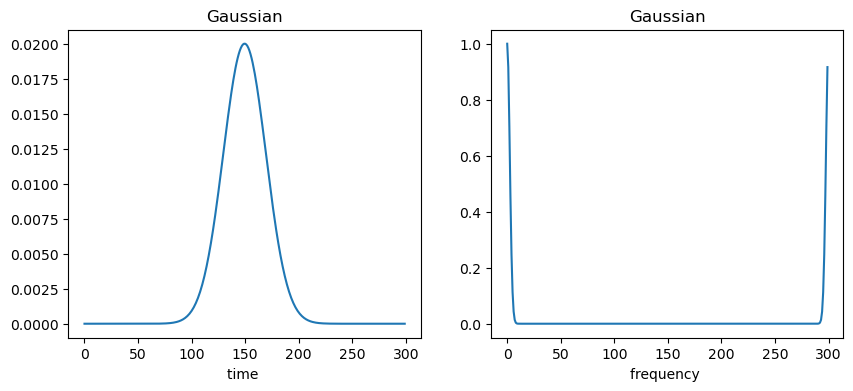

In [7]:
# define the gaussian in time
x,y = gaussian(0.05,n) 
# compute the filter in frequency
y_shifted = np.fft.fftshift(y)
fft_gauss = np.fft.fft(y_shifted)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(y) 
plt.xlabel("time ")
plt.title("Gaussian")
plt.subplot(1,2,2)
plt.plot(fft_gauss)  
plt.xlabel("frequency ")
plt.title("Gaussian")

In [8]:
# either I shift both functions or neither (i choose the latter)
fft_filt = np.multiply(fft_f,fft_gauss)

Text(0.5, 1.0, 'abs(Filtered DFT)')

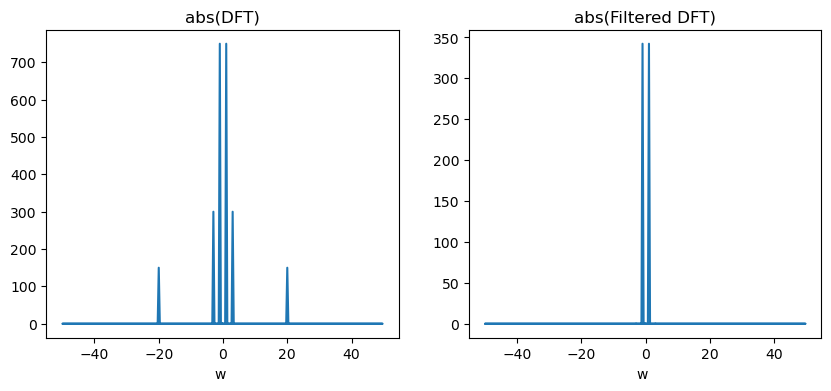

In [9]:
#plt.plot(np.fft.fftshift(fft_filt))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(freq,np.abs(fft_f)) 
plt.xlabel("w ")
plt.title("abs(DFT)")
plt.subplot(1,2,2)
plt.plot(freq,np.abs(fft_filt))  
plt.xlabel("w ")
plt.title("abs(Filtered DFT)")

Text(0, 0.5, 'y')

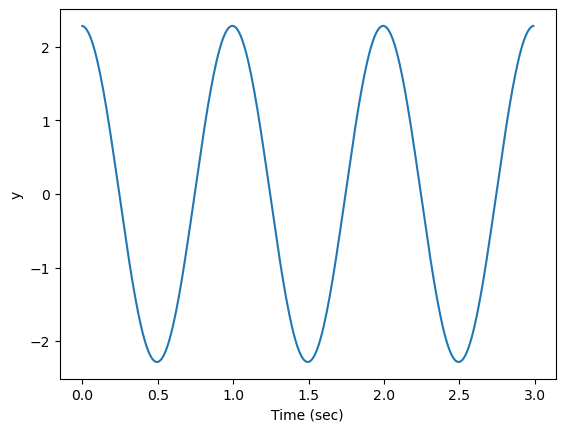

In [10]:
# inverse DFT
f_rec=np.fft.ifft(fft_filt)
#plt.plot(time, y_rec.real) # real part of inverse FFT
plt.plot(time,f_rec) #original signal
plt.xlabel("Time (sec)")
plt.ylabel("y")

## Filtering on the time domain

We apply convolution, using a windowed filter (approximating a gaussian)

In [11]:
from scipy import signal
windowg = signal.windows.gaussian(51, std=17)
plt.plot(windowg)
plt.title("Gaussian window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

ModuleNotFoundError: No module named 'scipy'

In [ ]:
from scipy.ndimage import convolve1d
filt=convolve1d(f,windowg)
plt.plot(filt)

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# another filter
window = signal.windows.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

NameError: name 'signal' is not defined

## Impulsive noise...

In [ ]:
f1 = np.copy(f)
#adding impulsive noise
f1[5] = f1[40] = 100
plt.plot(f1)


NameError: name 'np' is not defined

In [ ]:
filt1=convolve1d(f1,windowg)
plt.plot(filt1)

NameError: name 'convolve1d' is not defined

In [ ]:
# IT'S NON LINEAR! it's not a convolution
filt_med=signal.medfilt(f, kernel_size=None) 
plt.plot(filt_med)

NameError: name 'signal' is not defined

In [ ]:
#now we would be ready to apply the usual low pass filter